# Importing the Required Libraries and Taking a Peek at the Data

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring the Cab_Data.csv file
__The following columns are present in the dataset:__
- Transaction ID (txnID): ID of transactions of the rides by the Pink/Yellow Companies
- Date Of Travel (travel_date): Date of the ride
- Company (company): Which company did the ride
- City (city): Which city was the ride in
- KM Travelled (travel_distance): Distance of the ride
- Price Charged (price): Price charged by the company for the ride
- Cost of Trip (cost): Working cost of company for the ride

__Let us proceed with some Data Exploration for the individual files before moving on to rthe master data.__

In [14]:
cab_data = pd.read_csv('Datasets/Cab_Data.csv')
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [15]:
# Getting information of the continuous/numeric variables
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [16]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


__As we can see from the describe and info table, there are no missing values in Cab_Data.csv__

In [17]:
# Renaming the columns to help ease of querying
cab_data.columns = ['txnID','travel_date','company','city','travel_distance','price','cost']
cab_data.head()

,txnID,travel_date,company,city,travel_distance,price,cost
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Yellow Cab    274681
Pink Cab       84711
Name: company, dtype: int64


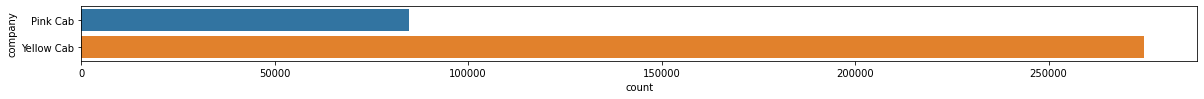

In [18]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='company', data=cab_data)
print(cab_data.company.value_counts())

__We can observe that the Yellow Company has done more than 3 times the rides than the Pink Cab did.__

__Let's go through the data about the number of rides in each city.__

In [19]:
def cab_separator(df, city):
    city_df = df[df['city'] == city]
    pink = city_df.company.value_counts()['Pink Cab']
    yellow = city_df.company.value_counts()['Yellow Cab']
    return pink,yellow

In [20]:
city_list = list(cab_data['city'].unique())
pink_list = []
yellow_list = []
for city in city_list:
    pink,yellow = cab_separator(cab_data, city)
    pink_list.append(pink)
    yellow_list.append(yellow)
pink_list

[1762,
 1868,
 5186,
 9361,
 1380,
 1394,
 19865,
 2002,
 1841,
 13967,
 1513,
 864,
 682,
 1334,
 10672,
 2732,
 3797,
 799,
 3692]

In [21]:
cab_data.groupby('company').city.value_counts()

company     city          
Pink Cab    LOS ANGELES CA    19865
            NEW YORK NY       13967
            SAN DIEGO CA      10672
            CHICAGO IL         9361
            BOSTON MA          5186
            SILICON VALLEY     3797
            WASHINGTON DC      3692
            SEATTLE WA         2732
            MIAMI FL           2002
            AUSTIN TX          1868
            NASHVILLE TN       1841
            ATLANTA GA         1762
            ORANGE COUNTY      1513
            DENVER CO          1394
            DALLAS TX          1380
            SACRAMENTO CA      1334
            PHOENIX AZ          864
            TUCSON AZ           799
            PITTSBURGH PA       682
Yellow Cab  NEW YORK NY       85918
            CHICAGO IL        47264
            WASHINGTON DC     40045
            LOS ANGELES CA    28168
            BOSTON MA         24506
            SAN DIEGO CA       9816
            ATLANTA GA         5795
            DALLAS TX          5637
 

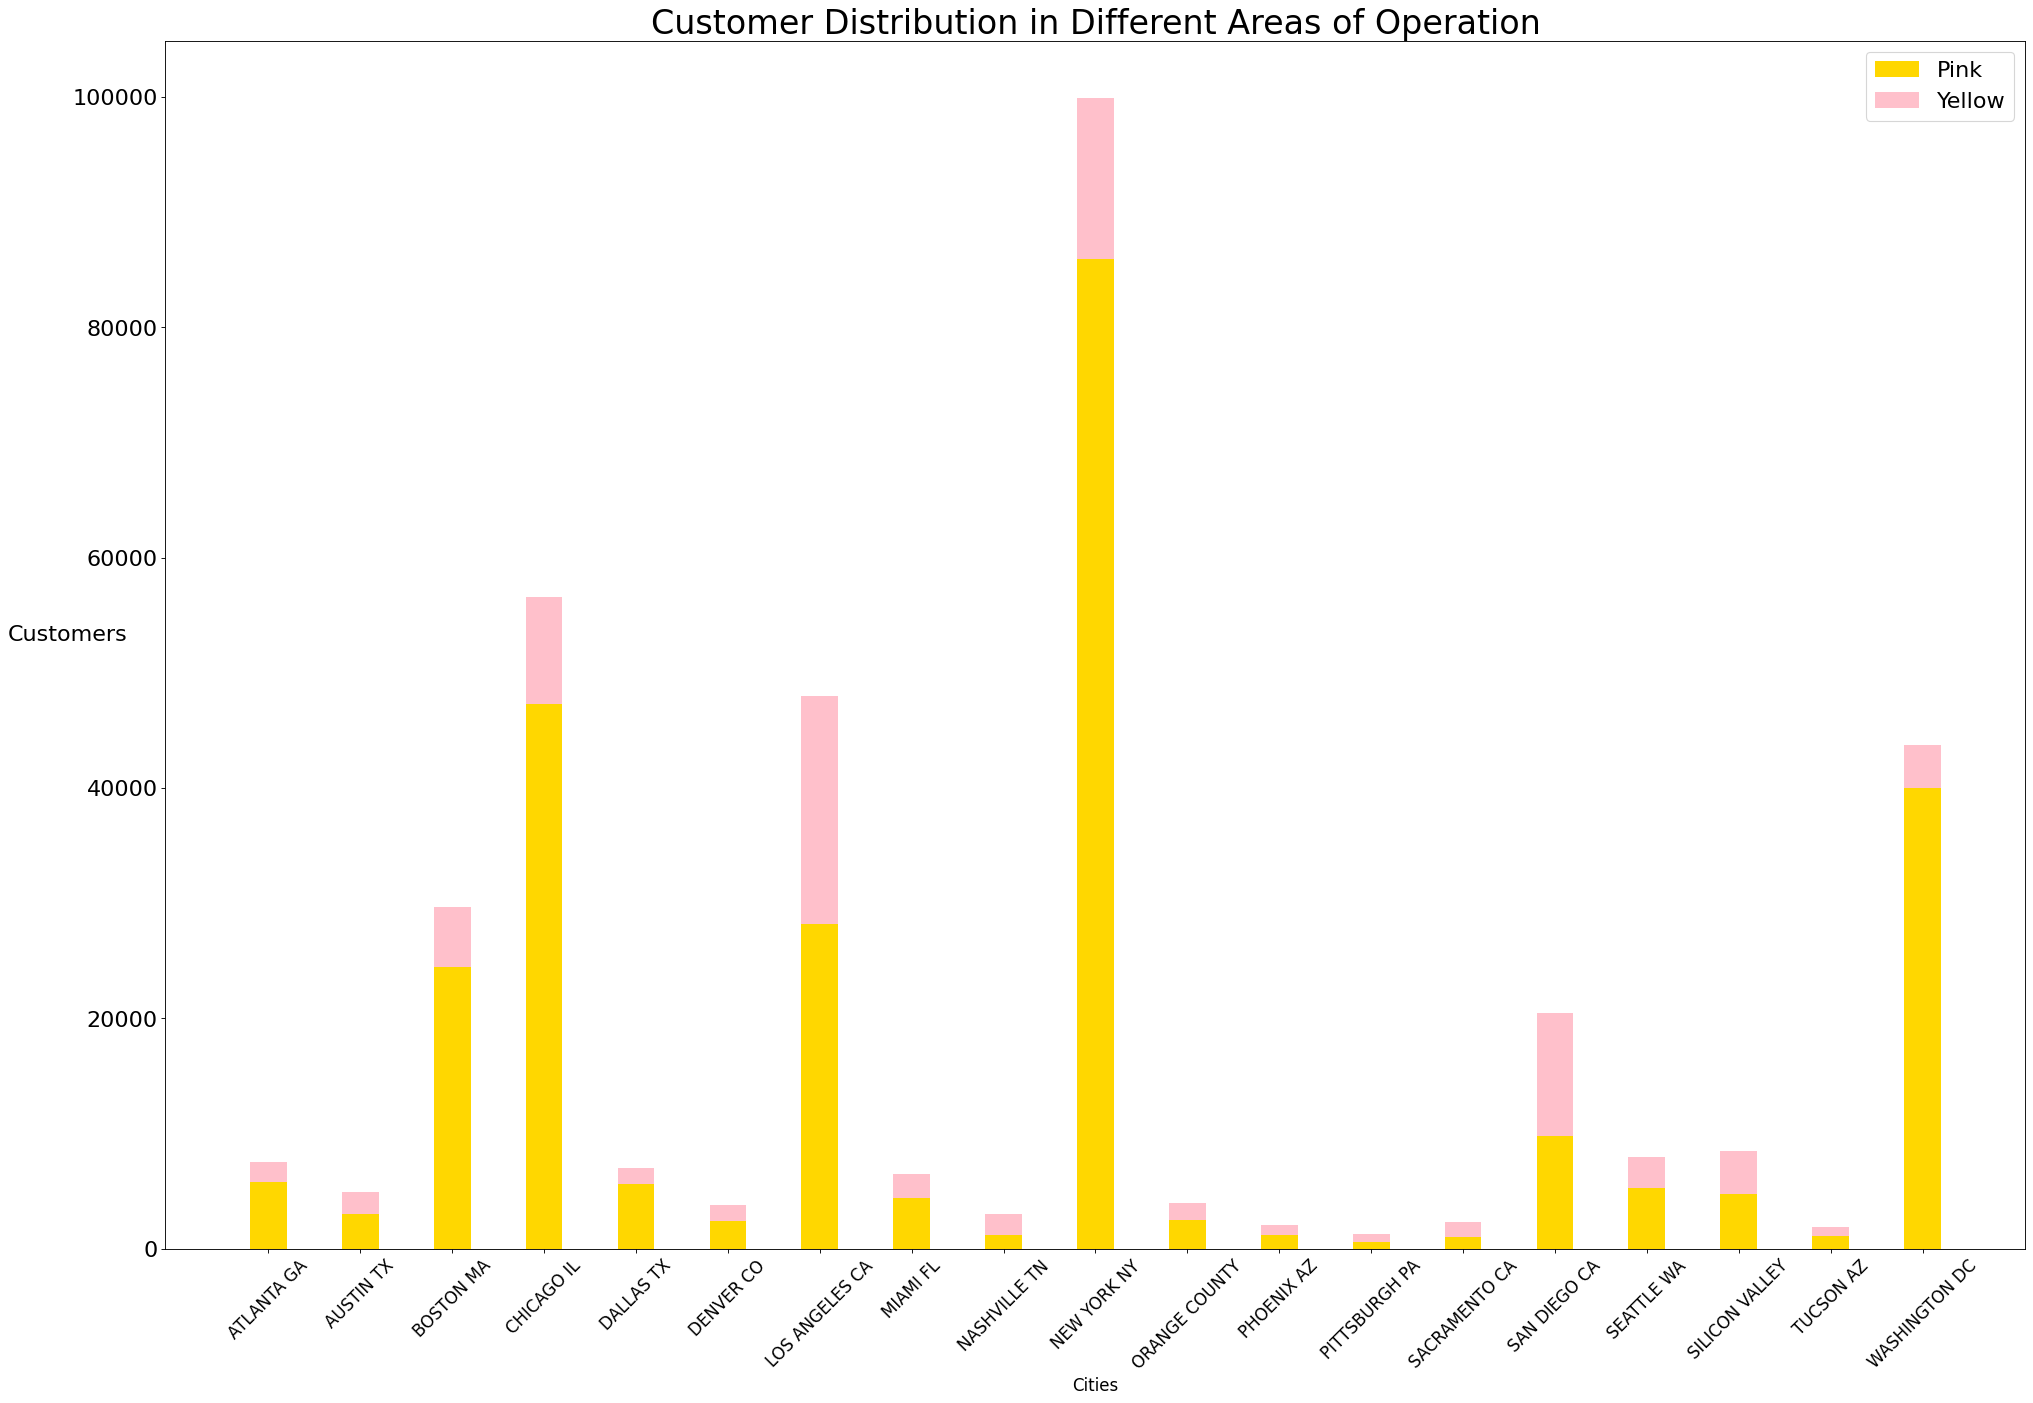

In [22]:
x = np.arange(19)
width = 0.40
plt.figure(figsize=(30, 20), dpi=80)
plt.bar(x, yellow_list, width, color='gold')
plt.bar(x, pink_list, width, bottom=yellow_list, color='pink')

plt.xticks(x, city_list, rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel("Cities", fontsize=15)
plt.ylabel('Customers', rotation=360, fontsize=20)
plt.title('Customer Distribution in Different Areas of Operation', fontsize=30)
plt.legend(['Pink','Yellow'], prop={'size':20}, fontsize=15)

__As we can see, the average profit made by the Yellow Company on rides shorter than 2 kms is significantly higher than the average profits made by the Pink Company.__

__In fact, we see this trend continue into the rides of all distances, with the average profit of the Yellow company being almost 2.56 times greater than the average profit earned by the Pink company.__

__By inspecting further the price and cost of both the companies, we observe that while Yellow company has a higher average cost than Pink Company, the difference being less than 50 dollars. The difference in average price, however, is much more significant with the Yellow company's price exceeding that of the Pink company's by almost 140 dollars.__

In [23]:
cab_data.groupby('company').cost.mean()

company
Pink Cab      248.148682
Yellow Cab    297.922004
Name: cost, dtype: float64

In [24]:
cab_data.groupby('company').price.mean()

company
Pink Cab      310.800856
Yellow Cab    458.181990
Name: price, dtype: float64

# Exploring the City.csv data

__The following columns are present in the dataset:__
- City (city): Name of the City
- Population (population): Population of the city
- Users (users): Number of cab users in the city

__Let us see the correlation between the population and users in each city and see if theres a pattern to observe.__

In [25]:
city = pd.read_csv('Datasets/City.csv')
city.columns = ['city','population','users']
city['population'] = city['population'].str.replace(',', '')
city['users'] = city['users'].str.replace(',', '')
city['population'] = city['population'].apply(lambda x: float(x.strip()))
city['users'] = city['users'].apply(lambda x: float(x.strip()))
city.corr()

,population,users
population,1.000000,0.703382
users,0.703382,1.000000


__As we can see, population and users are quite highly correlated with a value of 0.7 (approx.). With an increase in population, we see that there is an increase in the number of cab users.__

In [26]:
city.head()

,city,population,users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


# Exploring the Customer_ID.csv

__The following columns are present in the dataset:__     

- Customer ID   
- Gender     
- Age     
- Income (USD/Month)

In [27]:
customer = pd.read_csv('Datasets/Customer_ID.csv')
print(len(customer))
customer.head()

49171


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [28]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [29]:
customer.columns = ['cust_ID','gender','age','income_per_month_dollars']
customer = customer.set_index('cust_ID')
customer.head()

,gender,age,income_per_month_dollars
cust_ID,,,
29290,Male,28,10813
27703,Male,27,9237
28712,Male,53,11242
28020,Male,23,23327
27182,Male,33,8536


In [30]:
customer.groupby('gender').income_per_month_dollars.mean()

gender
Female    14986.068601
Male      15040.795460
Name: income_per_month_dollars, dtype: float64

In [31]:
customer.groupby('gender').age.mean()

gender
Female    35.307621
Male      35.410361
Name: age, dtype: float64

In [32]:
customer.groupby('gender').age.median()

gender
Female    33
Male      33
Name: age, dtype: int64

__By exploring this data, we see that the average age and income per month are pretty similar for both male and female. With the average age being around 35, we can see that the customers using cabs most frequently are those in the middle of their careers. Since the median of the age data for both genders is the same, we know that the age is quite similarly distributed.__

# Exploring the Transaction_ID.csv

__The following columns are present in the dataset:__     

- Transaction ID (txnID): Unique for each transaction
- Customer ID (custID): Uniwue for each customer
- Payment_Mode (mode_payment): Whether the customer uses cash or card

In [33]:
transactions = pd.read_csv('Datasets/Transaction_ID.csv')
transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [34]:
transactions.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


__We can see that the data in this dataset not only contains the data in for these 2 cab companies but others as well.__

In [35]:
transactions.Payment_Mode.value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

# Exploring Master_Data.csv

__The dataset has the following columns:__   

- Transaction ID (txnID): Uniqie Transaction ID
- Company (company): Which company did the ride
- City (city): City in which the ride took place
- Distance Travelled (travel_distance): Distance of the ride
- Price (price): Price charged by the company for the ride
- Cost (cost): Working cost put into the ride
- Profit (profit): Profit taken per ride
- Population (population): Population in the city
- User Ratio (user_ratio): Ratio of users to population in each city
- Customer ID (custID): Unique ID assigned to each customer
- Mode of Payment (mode_payment): Payment mode used to pay by each customer
- Gender (gender): The customer's age
- Income Per Month (income_per_month): The customer's monthly income
- State (state): The state in which the ride took place

In [36]:
master = pd.read_csv('Datasets/Master_Data.csv')
master.head()

,txnID,company,city,travel_distance,price,cost,profit,population,user_ratio,custID,mode_payment,gender,age,income_per_month,state
0,10000011,Pink Cab,ATLANTA,30.45,370.95,313.635,57.315,814885.0,0.030312,29290,Card,Male,28,10813,GA
1,10000012,Pink Cab,ATLANTA,28.62,358.52,334.854,23.666,814885.0,0.030312,27703,Card,Male,27,9237,GA
2,10000013,Pink Cab,ATLANTA,9.04,125.20,97.632,27.568,814885.0,0.030312,28712,Cash,Male,53,11242,GA
3,10000014,Pink Cab,ATLANTA,33.17,377.40,351.602,25.798,814885.0,0.030312,28020,Cash,Male,23,23327,GA
4,10000015,Pink Cab,ATLANTA,8.73,114.62,97.776,16.844,814885.0,0.030312,27182,Card,Male,33,8536,GA


# Feature Exploration

__Let us explore some features that might give us some useful insights. Questions:__   

- Relationship Between price and city/state
- Payment mode by age
- Profit Analysis and Cost Analysis
- Profit Analysis with gender, age, income
- More to come

In [74]:
avg_price_by_city = master.groupby(['company','city']).price.mean().sort_values()
avg_price_by_city

company     city        
Pink Cab    DALLAS          260.025652
            PITTSBURGH      273.879355
            DENVER          276.202453
            PHOENIX         280.321458
            CHICAGO         281.613731
            NASHVILLE       282.062493
            SACRAMENTO      290.110810
            SEATTLE         291.223898
            WASHINGTON      299.974561
            BOSTON          300.551489
            ATLANTA         302.131555
            LOS ANGELES     305.624252
            SAN DIEGO       307.938193
            ORANGE COUN     312.026874
            AUSTIN          320.435070
            TUCSON          323.213554
            MIAMI           326.006309
            SILICON VALL    340.377008
            NEW YORK        357.074129
Yellow Cab  BOSTON          359.140431
            SACRAMENTO      362.637106
            CHICAGO         364.021927
            TUCSON          366.018224
            NASHVILLE       376.245577
            WASHINGTON      381.051261


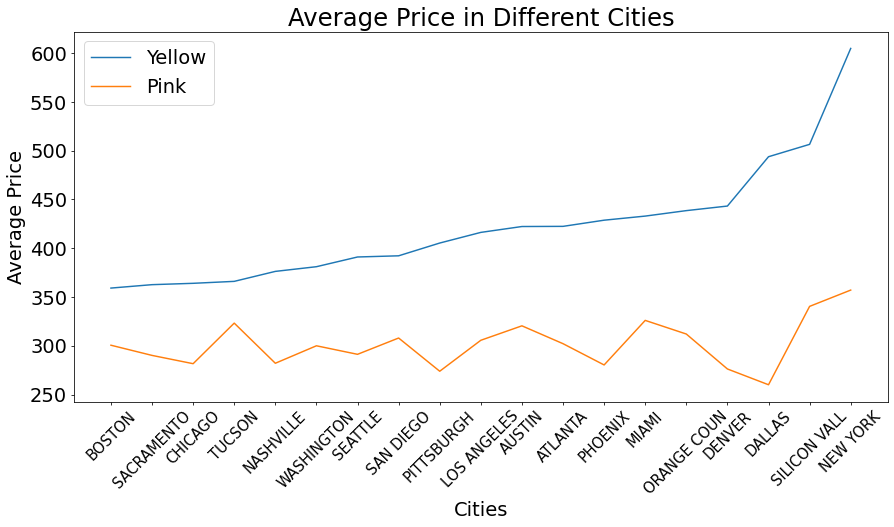

In [94]:
plt.figure(figsize=(15, 7), dpi=70)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Cities', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.title('Average Price in Different Cities', fontsize=25)
sns.lineplot(data=avg_price_by_city['Yellow Cab'], sort=True)
sns.lineplot(data=avg_price_by_city['Pink Cab'], sort=True)
plt.legend(['Yellow','Pink'], prop={'size':20}, fontsize=15)

# To be changed
__As we can observe the above graph, the most expensive cities for cabns include Miami, Silicon valley, Dallas and finally, New York. On the other hand, the cheapest cities for these rides are Nashville, Sacramento, Pittsburgh and so on.__

__Let us now explore a similar feature of the City-wise costs__

In [91]:
avg_cost_by_city = master.groupby(['company','city']).cost.mean().sort_values()
avg_cost_by_city

company     city        
Pink Cab    PHOENIX         239.121928
            AUSTIN          241.502901
            DALLAS          242.105281
            ORANGE COUN     244.613898
            MIAMI           244.936783
            DENVER          247.088437
            NASHVILLE       247.144224
            WASHINGTON      247.491800
            CHICAGO         247.565821
            ATLANTA         247.619594
            SAN DIEGO       248.165914
            SACRAMENTO      248.638537
            PITTSBURGH      248.794695
            NEW YORK        248.856589
            LOS ANGELES     248.955132
            TUCSON          249.008830
            SEATTLE         249.942297
            BOSTON          250.030529
            SILICON VALL    250.766650
Yellow Cab  ATLANTA         293.615723
            TUCSON          294.488966
            ORANGE COUN     294.763268
            SAN DIEGO       295.516553
            DENVER          296.382238
            NEW YORK        296.977659


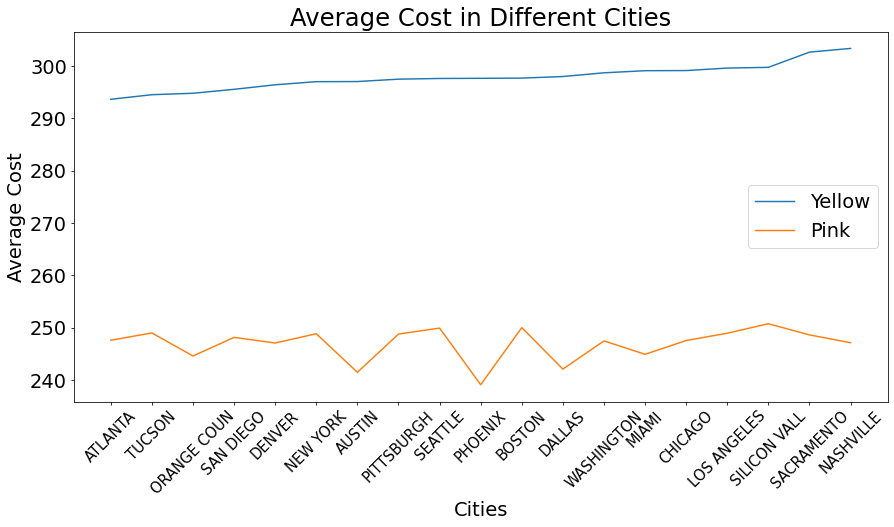

In [93]:
plt.figure(figsize=(15, 7), dpi=70)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Cities', fontsize=20)
plt.ylabel('Average Cost', fontsize=20)
plt.title('Average Cost in Different Cities', fontsize=25)
sns.lineplot(data=avg_cost_by_city['Yellow Cab'], sort=True)
sns.lineplot(data=avg_cost_by_city['Pink Cab'], sort=True)
plt.legend(['Yellow','Pink'], prop={'size':20}, fontsize=15)